### 1. Importing Libraries and Initializing the Client

This cell imports the necessary libraries, `matplotlib.pyplot` for plotting images and `InferenceClient` from the `huggingface_hub` library to interact with the Hugging Face Inference API. It also initializes the `InferenceClient` with an API key. The `api_key` have the permission to make calls to Inference Providers.

In [ ]:
import matplotlib.pyplot as plt
from huggingface_hub import InferenceClient
import random

client = InferenceClient(api_key="Huggingface-apiToken")



### 2. Defining Models and Aspect Ratios

This cell defines the available models for image generation and the supported aspect ratios. `models` is a list of strings, where each string is the name of a model on the Hugging Face Hub. `aspect_ratios` is a list of tuples, where each tuple contains the width, height, and a string representation of the aspect ratio.

In [ ]:
models = ["black-forest-labs/FLUX.1-dev",
          "ByteDance/Hyper-SD",
          "Kwai-Kolors/Kolors",
          "stabilityai/stable-diffusion-3-medium-diffusers"]
aspect_ratios = [(1024, 576,"16:9"),
                 (576, 1024,"9:16"),
                 (1024, 1024,"1:1")]

### 3. Getting User Input

This cell is responsible for getting user input. It prompts the user to enter a text prompt, select a model from the `models` list, choose an aspect ratio from the `aspect_ratios` list, and specify the number of images to generate. The user's selections are stored in the `user_prompt`, `model_number`, `choice`, and `image_count` variables.

This allows the user to decide:
1. Prompt for image generation 
2. Which **Model** to use.
3. Aspect Ratio
4. Number of images to be generated.


In [ ]:
user_prompt = input("Enter your prompt: ")

# Model selection

print("Please select a model:")
for i, model in enumerate(models):
    print(f"{i+1}: {model}")

while True:
    model_choice = int(input("Enter the number of your choice: "))
    if 1 <= model_choice <= len(models):
        model_number = model_choice - 1
        break
    else:
        print("Invalid choice. Please try again.")

# Aspect Ratio selection

print("Please select an aspect ratio:")
for i, (width, height, ratio_type) in enumerate(aspect_ratios):
    print(f"{i+1}: {width}x{height} ({ratio_type})")

while True :
  choice = int(input("Enter the number of your choice:  "))
  if 1 <= choice <= len(aspect_ratios):
    choice = choice -1
    break
  else:
    print("Invalid choice. Please try again.")

# Image Count selection

while True :
  image_count = int(input("Enter the Image Count(1-4): "))
  if 1 <= image_count <= 4:
    break
  else:
    print("Invalid choice. Please try again.")

Enter your prompt: A Cat balancing itself on a ball while holding an umbrella, surrounded by dogs.
Please select a model:
1: black-forest-labs/FLUX.1-dev
2: ByteDance/Hyper-SD
3: Kwai-Kolors/Kolors
4: stabilityai/stable-diffusion-3-medium-diffusers
Enter the number of your choice: 3
Please select an aspect ratio:
1: 1024x576 (16:9)
2: 576x1024 (9:16)
3: 1024x1024 (1:1)
Enter the number of your choice:  1
Enter the Image Count(1-4): 2


### 4. Generating and Displaying Images

This cell generates the images based on the user's input. It retrieves the selected width and height from the `aspect_ratios` list. Then, it iterates `image_count` times, and in each iteration, it calls the `client.text_to_image()` method to generate an image. The generated image is then displayed using `matplotlib.pyplot`.

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


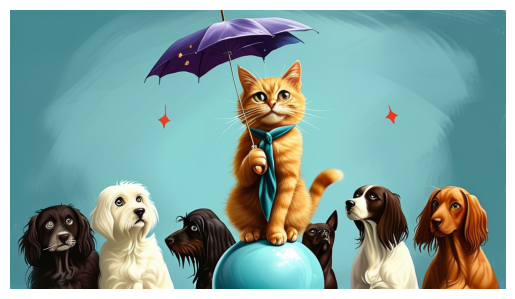

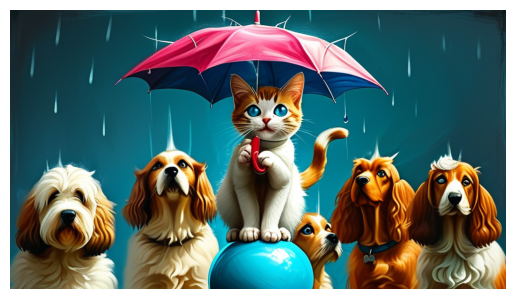

In [ ]:
selected_width, selected_height, _ = aspect_ratios[choice]
for i in range(image_count):
    image = client.text_to_image(
        prompt=user_prompt,
        model=models[model_number],
        num_inference_steps=50,
        guidance_scale=7.5,
        seed=random.randint(0, 100000),
        width=selected_width,
        height=selected_height
    )
    plt.imshow(image)
    plt.axis('off')
    plt.show()


### 5. Organizing Files

This cell contains shell commands to create the `templates` and `static` directories and move the necessary files (`style.css`, `index.html`, `error.html`, and `results.html`) into them.

`style.css`,`index.html`,`error.html`,`results.html` have to be uploaded onto google colab so that they can be moved into their respective folders.

In [ ]:
!mkdir -p templates static
!mv style.css static/
!mv index.html error.html results.html templates/

### 6. Installing pyngrok

This cell installs the `pyngrok` library, which is a Python wrapper for `ngrok`. `ngrok` allows you to expose a local web server to the internet.

In [ ]:
!pip install pyngrok

### 7. Setting up the Flask Web Application

This cell sets up and runs a Flask web application. It imports the necessary libraries, sets up the ngrok authentication token, and creates a Flask app. It defines three routes: `/`, `/generate`, and `/download`. The `/` route renders the main page, the `/generate` route handles the image generation, and the `/download` route allows users to download the generated images. The `ngrok.connect(5000)` line creates a public URL for the local Flask server.

**IMPORTANT :** 
1. `ngrok` is a service that creates a secure tunnel from the public internet to a web service running on your local machine. In this notebook, it's used to make the Flask web application (which is running locally in your Colab environment) accessible via a public URL.

2. Create your own token and put store it in the "secret key" section of colab as `value`. Set the key as `NGROK_AUTHTOKEN`

3. Alternatively, you can directly use your token as argument.

All the images generated by the user in a session are remembered and visible. Any image generated in the session can be downloaded.

In [ ]:
from flask import Flask, render_template, request, send_file
from pyngrok import ngrok
import io
import base64
from google.colab import userdata

#Create authtoken from ngrok.

# The authtoken can be stored as a secret key for confidentiality
# If the authtoken is being stored as secret key, then uncomment the following code

"""
from google.colab import userdata

# Set the authtoken
ngrok.set_auth_token(userdata.get('NGROK_AUTHTOKEN'))
"""

# The authtoken can also be used as argument as done here.

# Set the authtoken
ngrok.set_auth_token(userdata.get('your auth_token'))

app = Flask(__name__, template_folder='/content/templates')

# Open a http tunnel on the default port 5000
public_url = ngrok.connect(5000)
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}/\"".format(public_url, 5000))

# Update any base URLs to the public ngrok URL
app.config["BASE_URL"] = public_url

# Global variable to store generated images
generated_images = []

@app.route('/')
def index():
    return render_template('index.html', models=models, aspect_ratios=aspect_ratios, images=generated_images)

@app.route('/generate', methods=['POST'])
def generate():
    global generated_images
    try:
        prompt = request.form['prompt']
        model = request.form['model']
        aspect_ratio = request.form['aspect_ratio']
        image_count = int(request.form['image_count'])

        width, height = map(int, aspect_ratio.split('x'))

        for i in range(image_count):
            image = client.text_to_image(
                prompt=prompt,
                model=model,
                num_inference_steps=50,
                guidance_scale=7.5,
                seed=random.randint(0, 100000),
                width=width,
                height=height
            )

            # Encode image to base64
            buffered = io.BytesIO()
            image.save(buffered, format="PNG")
            img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
            generated_images.append(img_str)

        return render_template('index.html', models=models, aspect_ratios=aspect_ratios, images=generated_images)
    except Exception as e:
        return render_template('error.html', error=str(e))


@app.route('/download/<image_index>')
def download(image_index):
    try:
        image_data = base64.b64decode(generated_images[int(image_index)])
        return send_file(
            io.BytesIO(image_data),
            mimetype='image/png',
            as_attachment=True,
            download_name='generated_image.png'
        )
    except Exception as e:
        return render_template('error.html', error=str(e))

if __name__ == '__main__':
    app.run()

 * ngrok tunnel "NgrokTunnel: "https://becd5fe99024.ngrok-free.app" -> "http://localhost:5000"" -> "http://127.0.0.1:5000/"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:01:50] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:01:50] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:01:51] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:01:51] "GET /static/Images/Human.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:02:38] "POST /generate HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:02:39] "GET /static/style.css HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:02:39] "GET /static/Images/Human.png HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:05:29] "POST /generate HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [02/Aug/2025 06:05:29] "GET /static/style.css HTTP/1.1" 200 -
INFO:we